# Plotting Final Results

In [31]:
import json
import matplotlib.pyplot as plt
import numpy as np



In [35]:
RESULTS_PATH = 'data/results/'
file_names = ['f_PPO_counting_1_deck_linear_lr_results.json','f_PPO_counting_2_decks_linear_lr_results.json','f_PPO_counting_4_decks_linear_lr_results.json','f_PPO_no_counting_1_deck_linear_lr_results.json','f_PPO_no_counting_1_deck_linear_lr4_decks_results.json']
odds = 20.0
baseline_file_name = 'baselines_performance.json'


In [57]:

model_labels_dict = {
    'baseline_4_no_count': "4 decks NC baseline",
    'baseline_4_count': "4 decks baseline",
    'f_PPO_counting_4_decks_linear_lr.zip': "4 decks PPO",
    'f_PPO_no_counting_1_deck_linear_lr.zip_4_decks': "4 decks PPO *",
    'baseline_2_no_count': "2 decks NC baseline",
    'baseline_2_count': "2 decks baseline",
    'f_PPO_counting_2_decks_linear_lr.zip': "2 decks PPO",
    'baseline_1_no_count': "1 deck NC baseline",
    'baseline_1_count': "1 deck baseline",
    'f_PPO_counting_1_deck_linear_lr.zip': "1 deck PPO",
}

In [58]:
results_dict = {}

for file_name in file_names:
    with open(RESULTS_PATH + file_name) as f:
        model_name = file_name.replace('_results.json', '.zip')
        if file_name == 'f_PPO_no_counting_1_deck_linear_lr4_decks_results.json':
            model_name = 'f_PPO_no_counting_1_deck_linear_lr.zip'
            results_dict[model_name+'_4_decks'] = json.load(f)[model_name]
        else:
            results_dict[model_name] = json.load(f)[model_name]

with open(RESULTS_PATH + baseline_file_name) as f:
    baseline_dict = json.load(f)
    for baseline_name, baseline_results in baseline_dict.items():
        results_dict[baseline_name] = baseline_results


print(results_dict)


{'f_PPO_counting_1_deck_linear_lr.zip': {'avg_return': [0.0002, 0.00964, 0.005995, 0.00325, 0.001725], 'avg_return_bet_high': [0.07768037761294673, 0.08021210900792053, 0.07559138363948725, 0.0735575608422204, 0.055088702147525676], 'avg_return_bet_low': [-0.006005292433979586, 0.003959978822487061, 0.00029751279305010117, -0.0022980816951858963, -0.0025999156784104298], 'avg_return_bet_dynamic': [0.10964, 0.123165, 0.114675, 0.10547, 0.080195], 'avg_bet': [2.40885, 2.41531, 2.43773, 2.38966, 2.42443], 'avg_edge': [0.045515494945720984, 0.05099345425638945, 0.047041715038170756, 0.044135985872467205, 0.03307787809918208], 'min_edge': 0.03307787809918208, 'max_edge': 0.05099345425638945}, 'f_PPO_counting_2_decks_linear_lr.zip': {'avg_return': [-0.00355, -0.00294, -0.007135, -0.0079, -0.00459], 'avg_return_bet_high': [0.052995602784902895, 0.040628680134070116, 0.0470356093979442, 0.03273648037619823, 0.028365207796984187], 'avg_return_bet_low': [-0.010478873871851287, -0.008346354020301

(array([-0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06]),
 [Text(-0.01, 0, '−0.01'),
  Text(0.0, 0, '0.00'),
  Text(0.01, 0, '0.01'),
  Text(0.019999999999999997, 0, '0.02'),
  Text(0.03, 0, '0.03'),
  Text(0.04, 0, '0.04'),
  Text(0.049999999999999996, 0, '0.05'),
  Text(0.060000000000000005, 0, '0.06')])

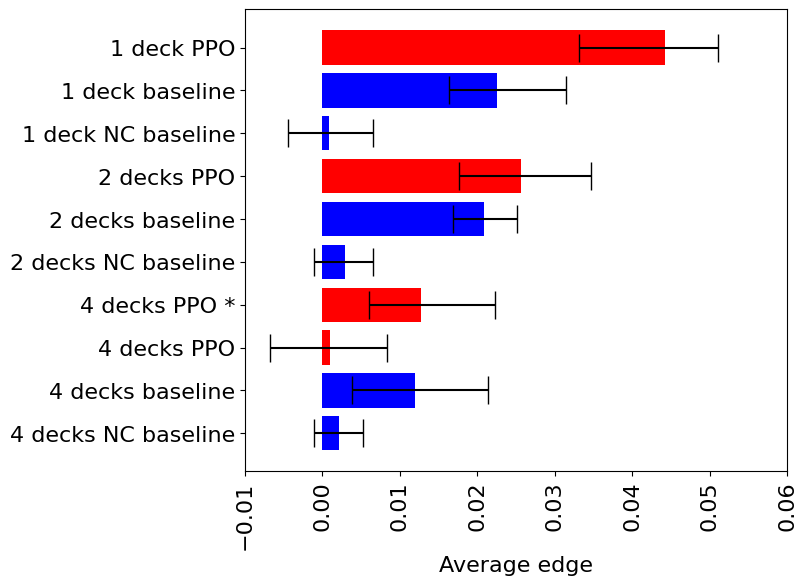

In [67]:
#bar plot comparing baseline to models

fig, ax = plt.subplots(figsize=(7, 6))
model_names = list(results_dict.keys())
#font size
plt.rc('font', size=16)
#horizontal bar plot

for model_name, display_name in model_labels_dict.items():
    #use min max error bars
    mean_edge = np.mean(results_dict[model_name]['avg_edge'])
    err_top = results_dict[model_name]['max_edge'] - mean_edge
    err_bottom = mean_edge - results_dict[model_name]['min_edge']
    color = 'red' if 'PPO' in display_name else 'blue'
    ax.barh(display_name, mean_edge, xerr=[[err_bottom], [err_top]], capsize=10, color=color)
#rotate x labels
ax.set_xlim(-0.01, 0.06)
ax.set_xlabel('Average edge')
ax.set_xticks(np.arange(-0.01, 0.07, 0.01))
plt.xticks(rotation=90)